In [2]:
# init bigquery client
from google.cloud import bigquery
client = bigquery.Client()

In [3]:
sql = """
SELECT DATE_TRUNC(DATE(transactions.block_timestamp), MONTH) AS tx_month, COUNT(*) AS tx_count
FROM `bigquery-public-data.ethereum_blockchain.transactions` AS transactions
WHERE DATE(transactions.block_timestamp) > DATE('2015-07-31') and DATE(transactions.block_timestamp) < DATE('2018-09-01')
GROUP BY tx_month
ORDER by tx_month ASC
"""
df = client.query(sql).to_dataframe()
df.head()

,tx_month,tx_count
0,2015-08-01,85609
1,2015-09-01,173805
2,2015-10-01,205045
3,2015-11-01,234733
4,2015-12-01,347092


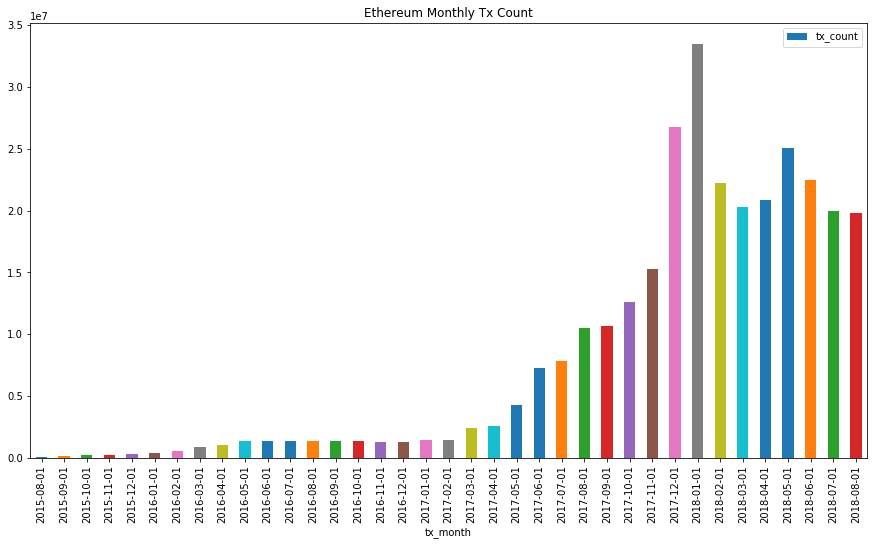

In [5]:
df.plot(kind='bar', x='tx_month', y='tx_count',title='Ethereum Monthly Tx Count', figsize=(15,8))

In [44]:
tx_count_delta = df['tx_count'].diff()[1:]

In [103]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# convert to int
eth_market_info['Volume'] = eth_market_info['Volume'].astype('int64')
# look at the first few rows
eth_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-09-03,295.18,295.59,287.43,289.26,1394490000,30025069120
1,2018-09-02,295.45,298.69,290.93,294.37,1321050000,30046692957
2,2018-09-01,283.50,301.14,283.50,295.34,1546630000,28824991126
3,2018-08-31,284.12,284.55,278.51,283.00,1411910000,28882613519
4,2018-08-30,289.75,291.24,275.21,284.11,1513100000,29449252259


In [104]:
import numpy as np
import matplotlib.pyplot as plt

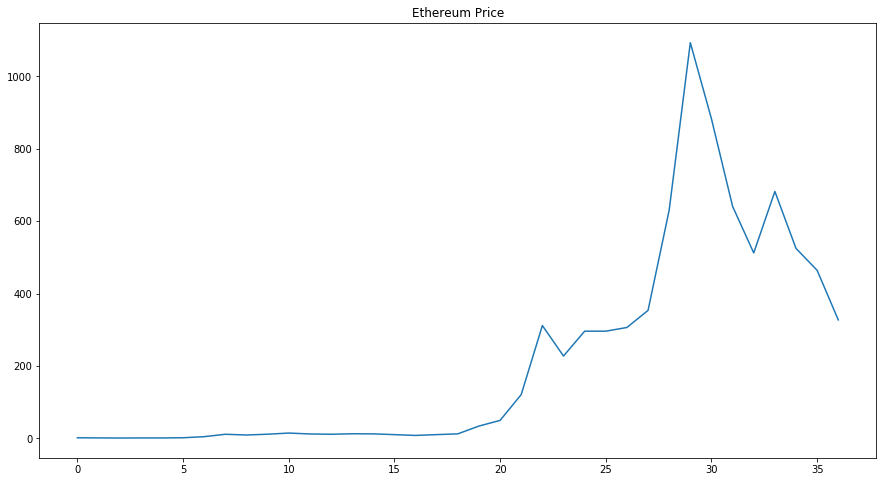

In [140]:
eth_market_info.sort_values(by=['Date']).head()
grouped = eth_market_info.groupby([eth_market_info.Date.dt.year, eth_market_info.Date.dt.month]).mean()
grouped_tuple = grouped.aggregate(lambda x: tuple(x))
prices = grouped_tuple['Open*']
prices = prices[:-1] # exclude september
price_delta = np.diff(prices)
plt.figure(figsize=(15,8))
plt.title('Ethereum Price')
plt.plot(prices)

In [126]:
price_delta_arr = np.asarray(price_delta)
normalized_price_delta = (price_delta_arr - price_delta_arr.min())/(price_delta_arr.max() - price_delta_arr.min()) 

In [127]:
tx_count_delta_arr = np.asarray(tx_count_delta)
normalized_tx_count_delta = (tx_count_delta_arr - tx_count_delta_arr.min())/(tx_count_delta_arr.max() - tx_count_delta_arr.min()) 

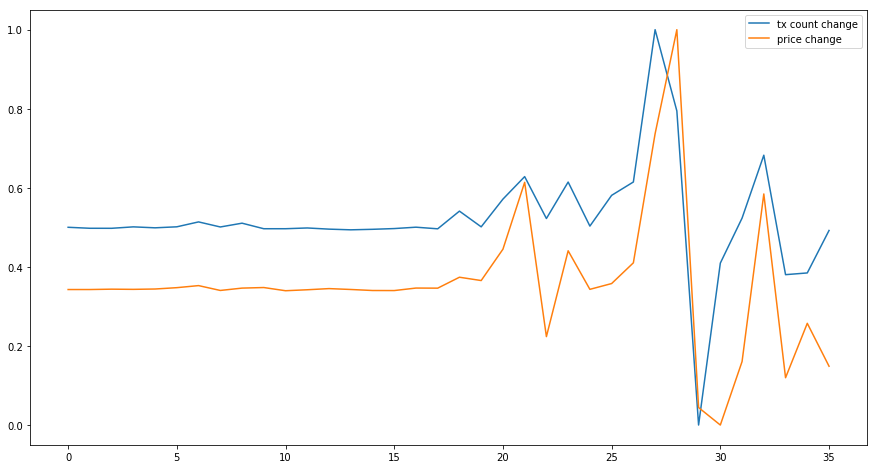

In [128]:
plt.figure(figsize=(15,8))
plt.plot(normalized_tx_count_delta, label='tx count change')
plt.plot(normalized_price_delta, label='price change')
plt.legend()
plt.show()

In [142]:
np.corrcoef(normalized_tx_count_delta, normalized_price_delta)[0][1]

0.8030832019911807